In [2]:
import sys
sys.path.append('../')
import importlib

import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sbn
from contextlib import redirect_stdout
import json
import ast

import Reinforce as rln
import DataGeneration as dgen
import Classifier as clf
import TuningCurves as tun
import SL_MONKEYtask as sln_mky

# Supervised Learning

In [3]:
importlib.reload(sln_mky)

trials = 1000

inputs_train, targets_train, inputs_val, targets_val, mask_train, mask_val = sln_mky.generate_monkey_data(trials)

inputs_train = inputs_train.to(torch.float64)
inputs_val = inputs_val.to(torch.float64)

In [4]:
importlib.reload(rln)

reinforce = rln.REINFORCE()

losses = reinforce.s_learning(inputs_train, targets_train, mask_train, lr=1e-3)

Initial loss: 0.239.
Loss: 0.239
Loss: 0.076
Loss: 0.026
Loss: 0.016
Loss: 0.010
Loss: 0.010
Loss: 0.009
Loss: 0.010
Loss: 0.009
Loss: 0.007
Loss: 0.009
Loss: 0.010
Loss: 0.007
Loss: 0.006
Loss: 0.006
Loss: 0.007
Loss: 0.009
Loss: 0.008
Loss: 0.007
Loss: 0.007
Loss: 0.007
Loss: 0.007
Loss: 0.005
Loss: 0.008
Loss: 0.006
Loss: 0.006
Loss: 0.006
Loss: 0.009
Loss: 0.005
Loss: 0.006
Loss: 0.007
Loss: 0.006
Loss: 0.006
Loss: 0.006
Loss: 0.006
Loss: 0.006
Loss: 0.006
Loss: 0.008
Loss: 0.005
Loss: 0.006
Loss: 0.005
Loss: 0.005
Loss: 0.006
Loss: 0.006
Loss: 0.005
Loss: 0.005
Loss: 0.006
Loss: 0.004
Loss: 0.005
Loss: 0.004


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 <a list of 8 Text major ticklabel objects>)

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


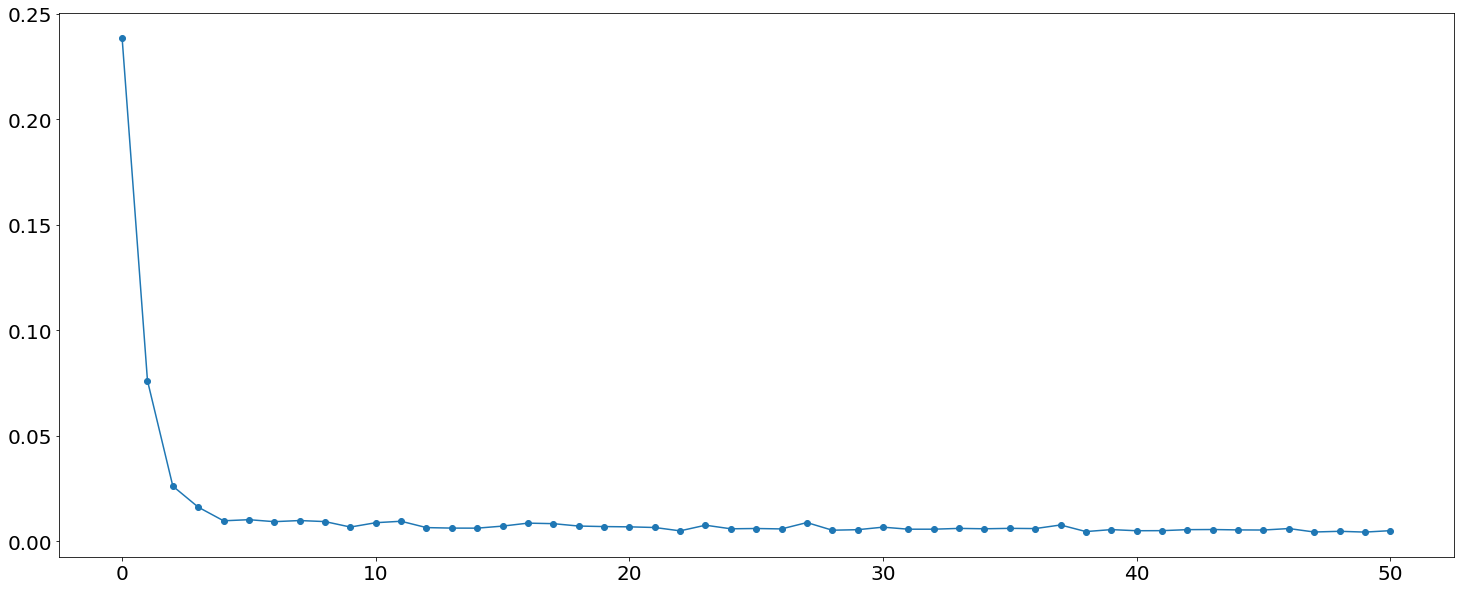

In [5]:
plt.figure(figsize=(25,10))
plt.plot(losses, "o-")
plt.xticks(size=20)
plt.yticks(size=20)

In [8]:
inputs_val = inputs_val.to(torch.float64)
output = reinforce.actor_network(inputs_val).clone().detach()

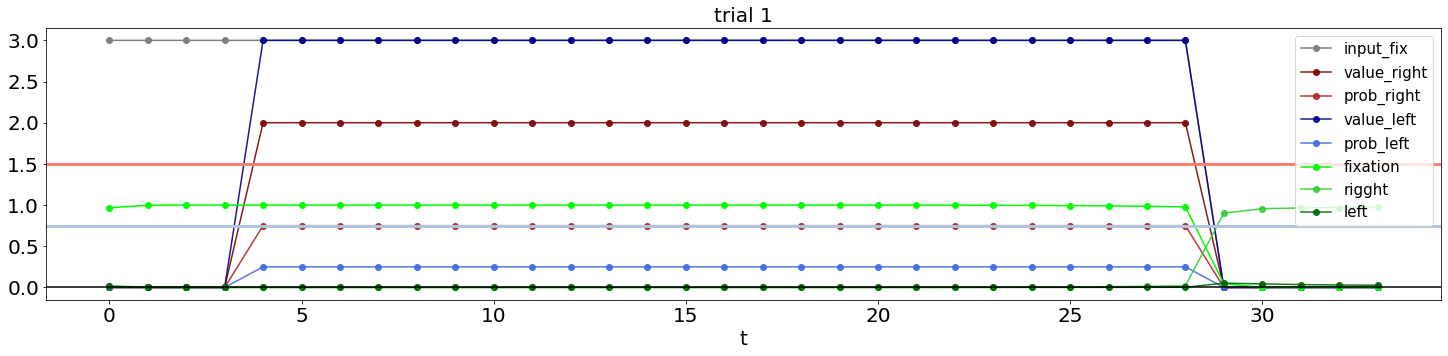

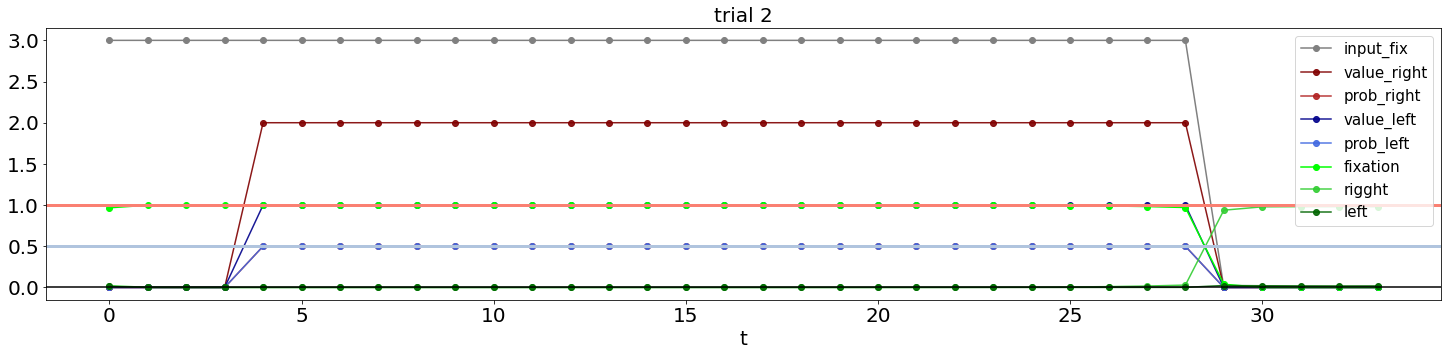

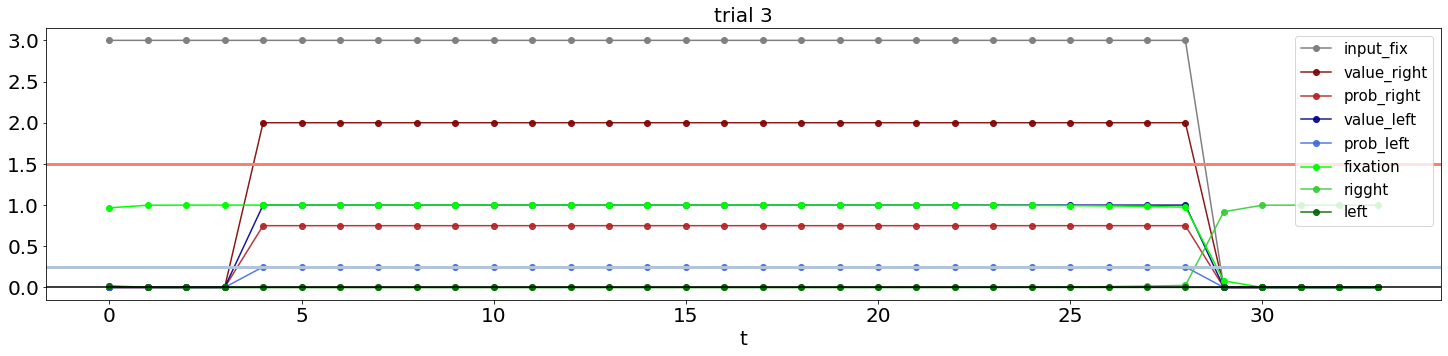

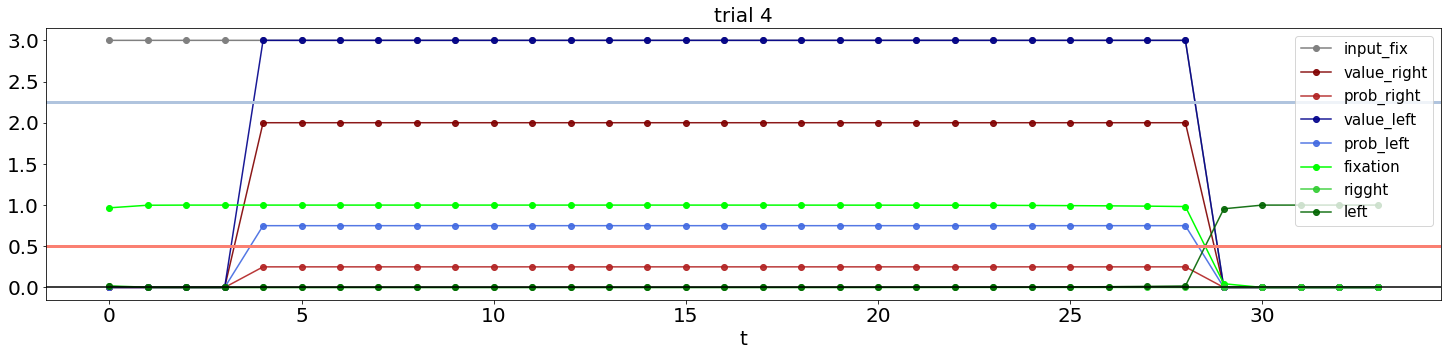

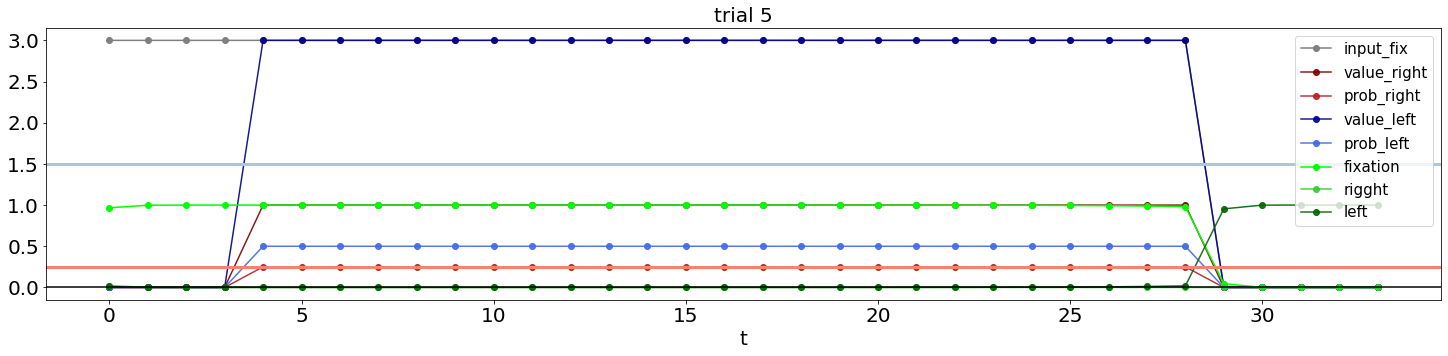

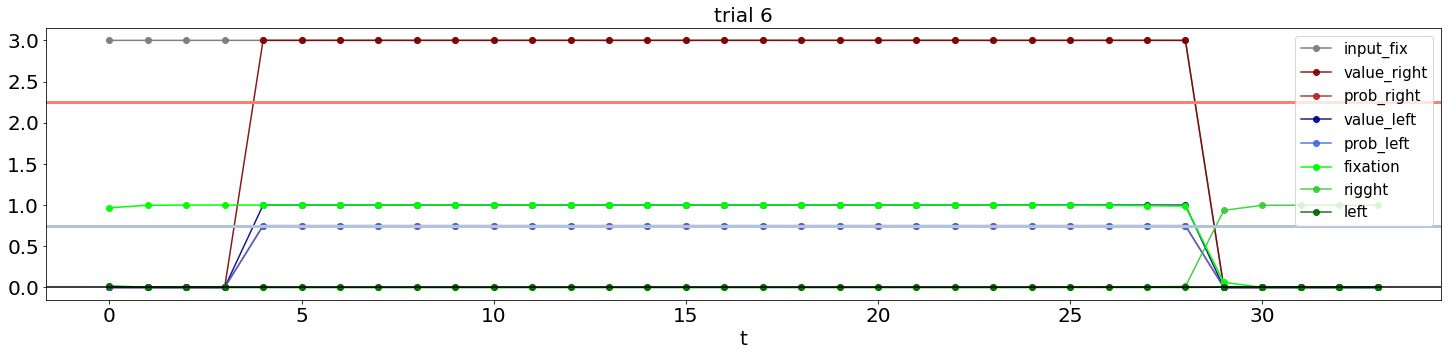

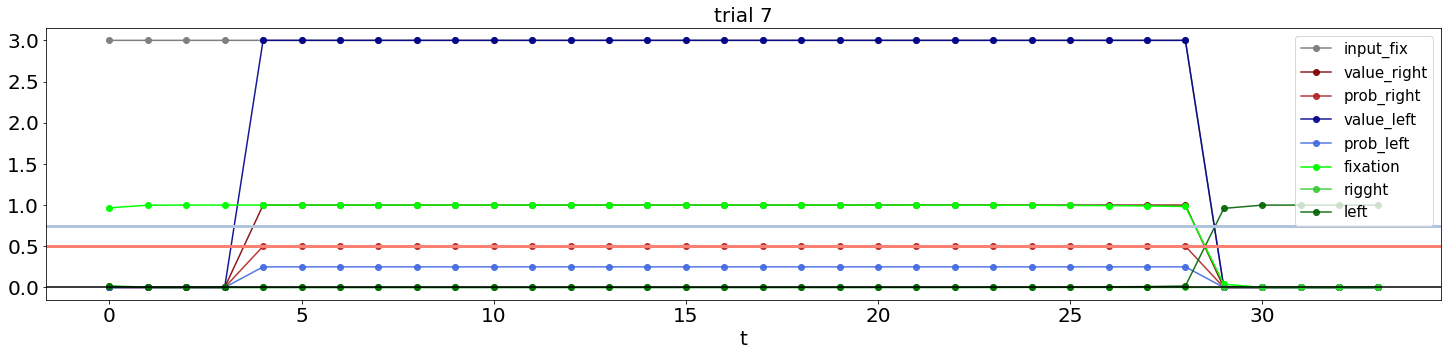

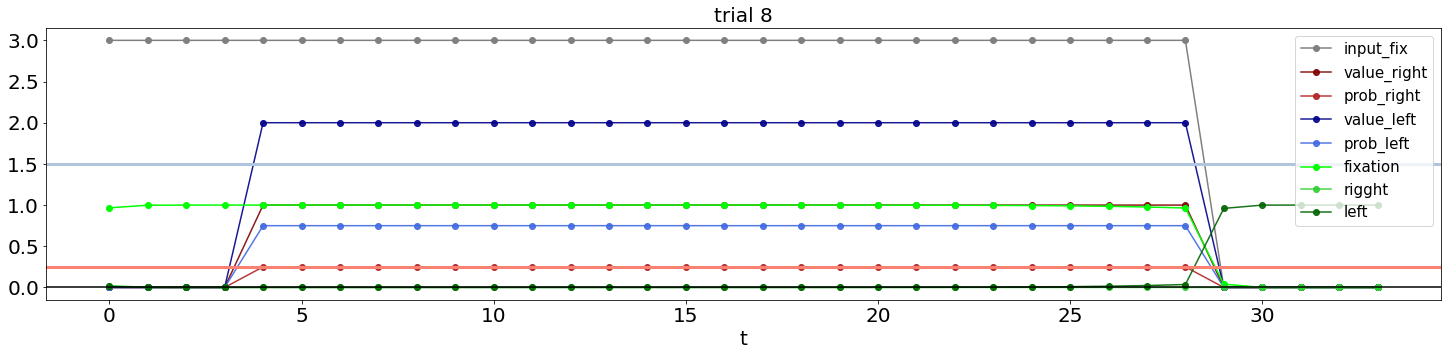

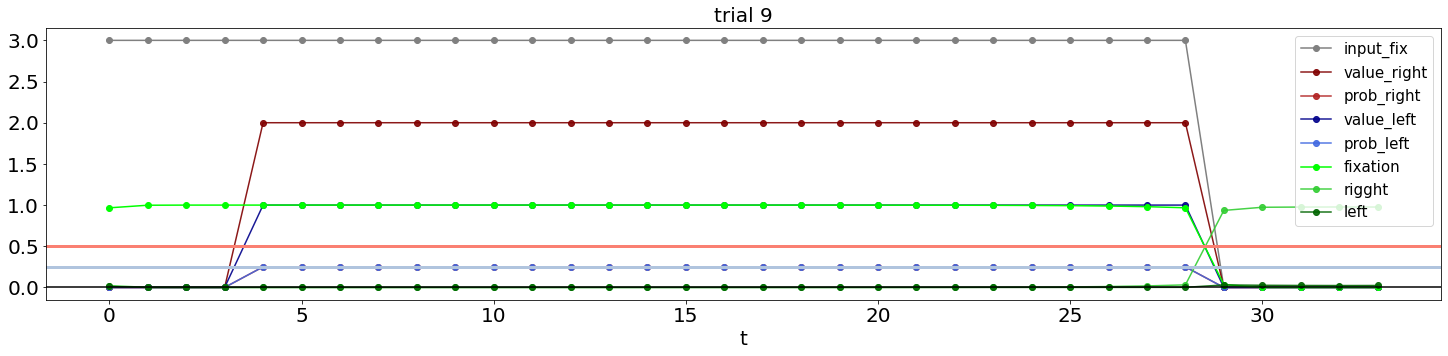

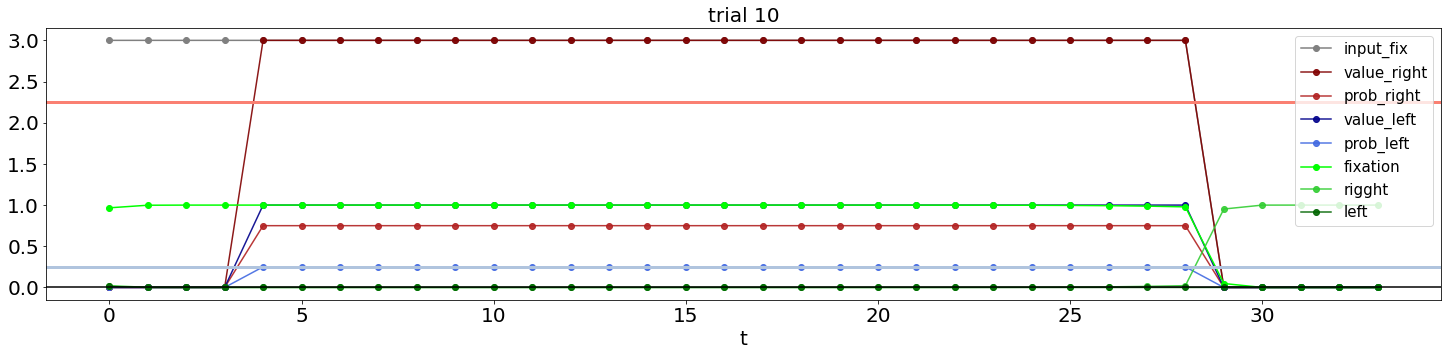

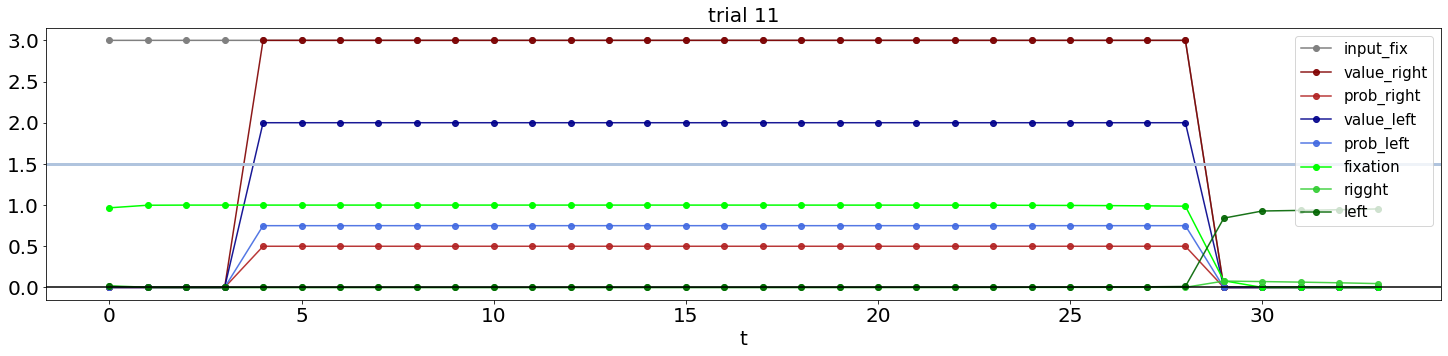

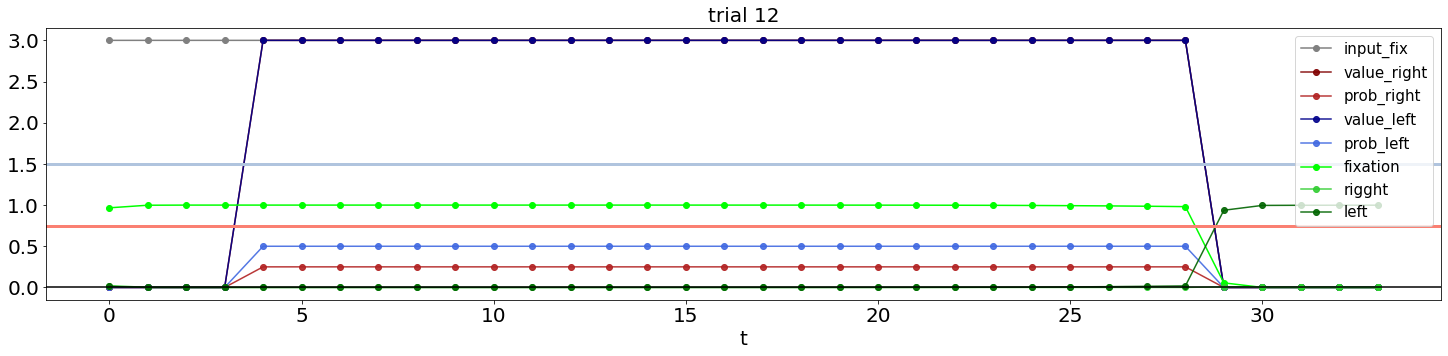

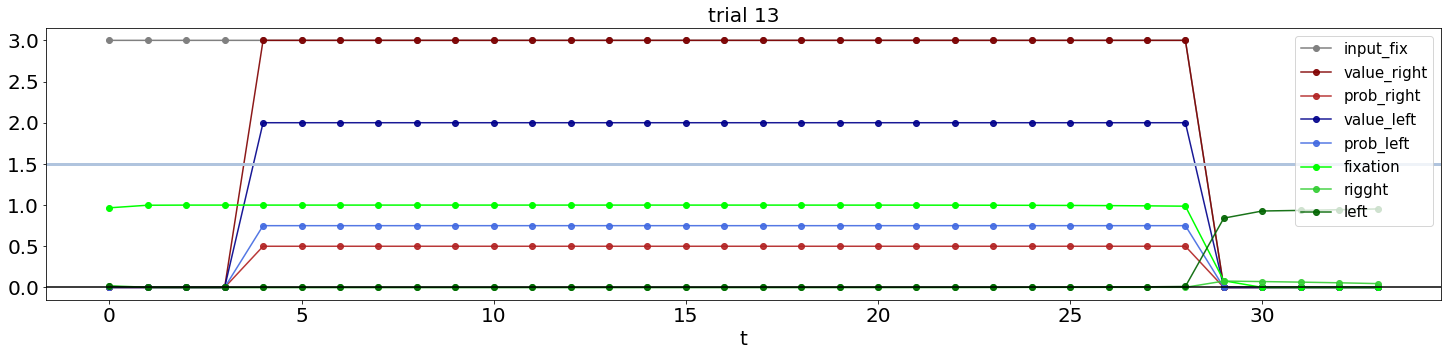

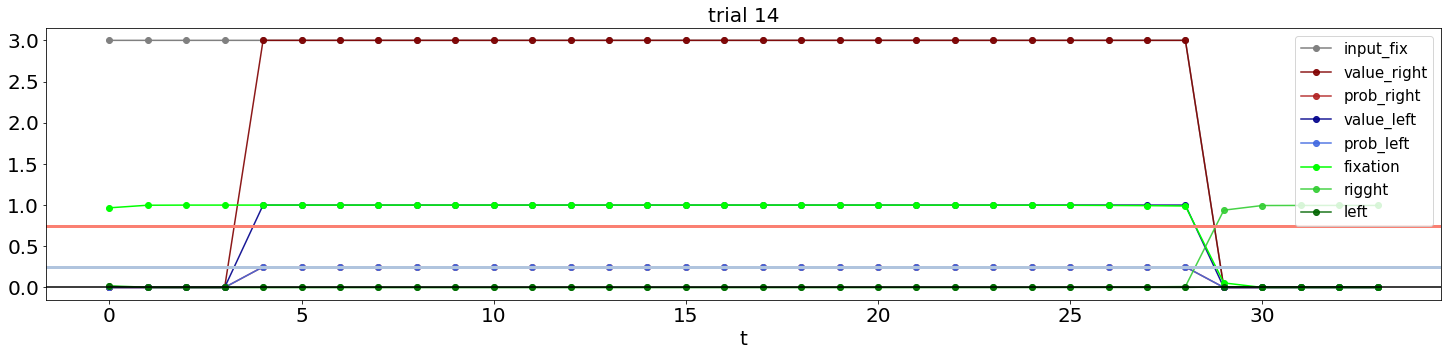

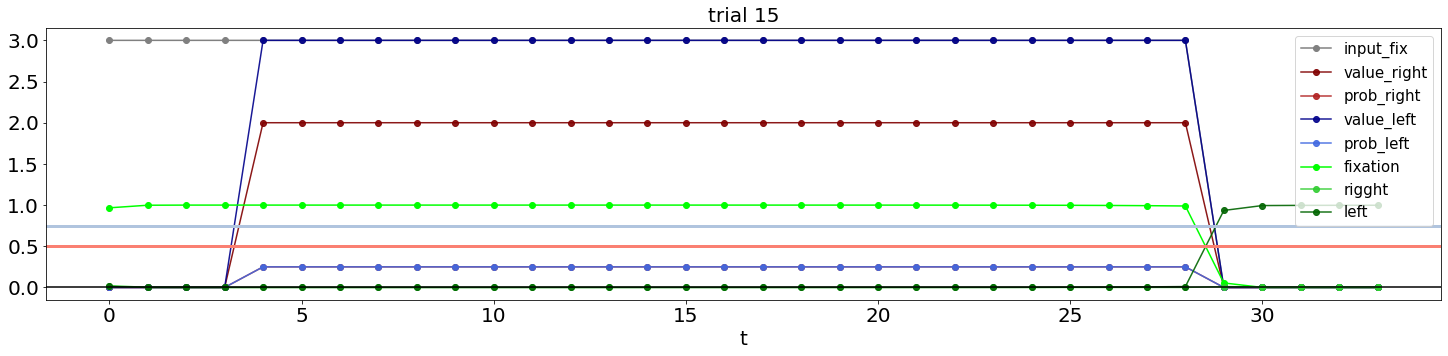

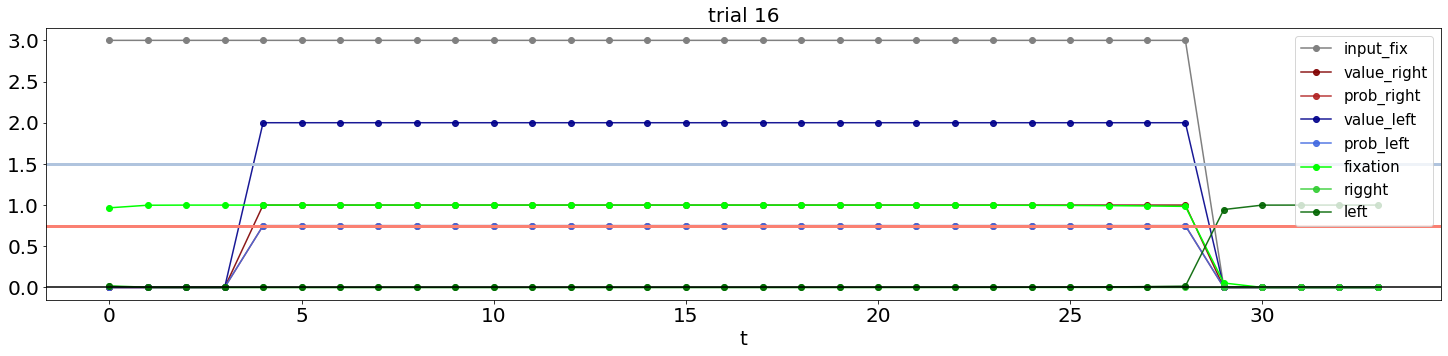

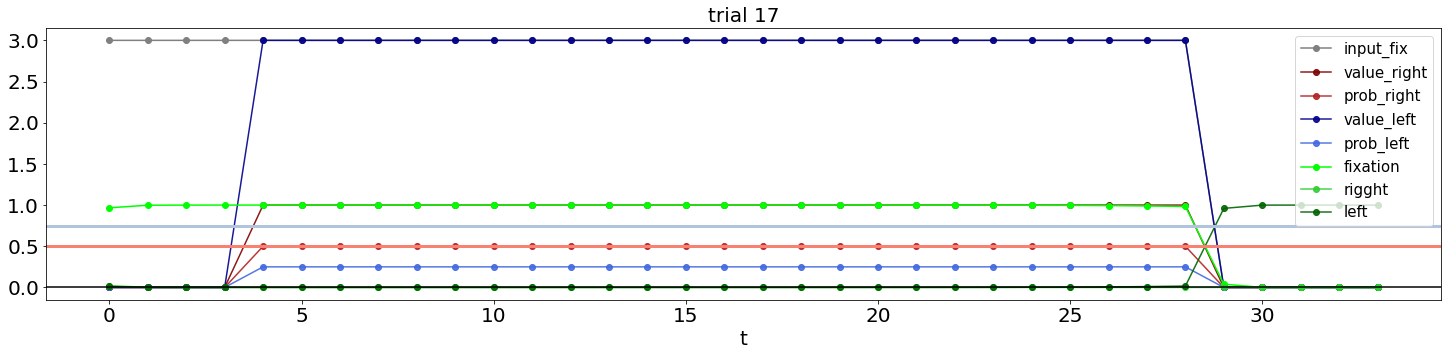

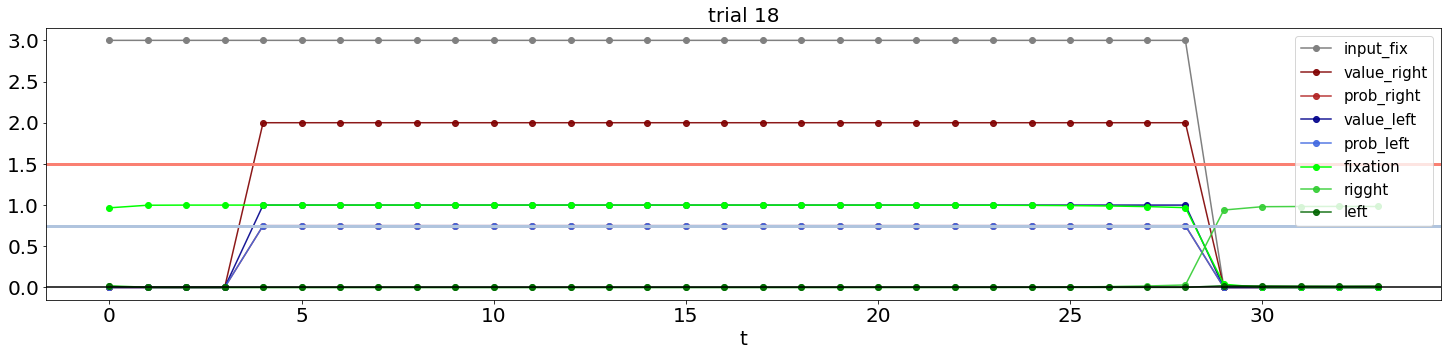

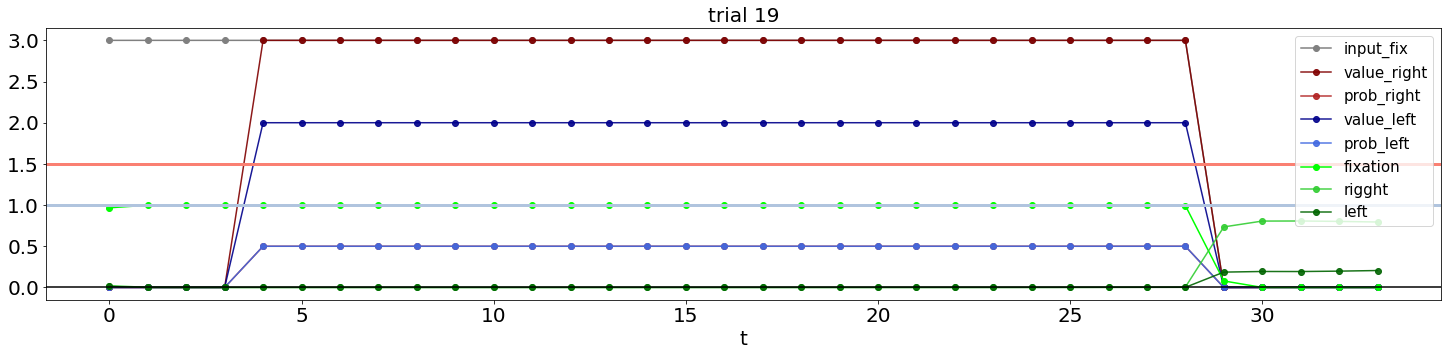

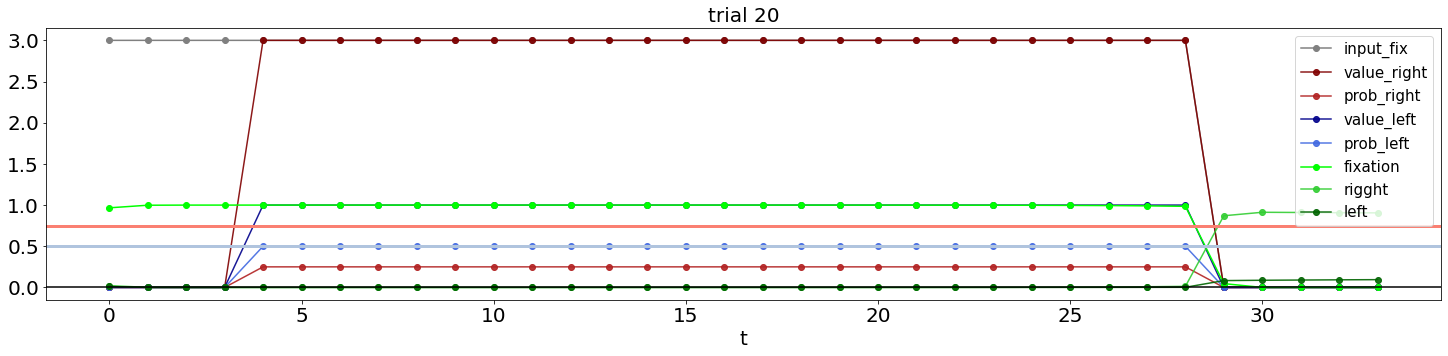

In [9]:
for i in range(20):
    
    obs = np.asarray(inputs_val[i]).T
    targets = np.asarray(output[i]).T

    plt.figure(figsize=(25,5))

    plt.plot(obs[0], "-o", label="input_fix", color="gray")
    plt.plot(obs[1], "-o", label="value_right", color="maroon", alpha=0.9)
    plt.plot(obs[2], "-o", label="prob_right", color="firebrick", alpha=0.9)
    plt.plot(obs[3], "-o", label="value_left", color="darkblue", alpha=0.9)
    plt.plot(obs[4], "-o", label="prob_left", color="royalblue", alpha=0.9)
    plt.plot(targets[0], "-o", label="fixation", color="lime")
    plt.plot(targets[1], "-o", label="rigght", color="limegreen", alpha=0.9)
    plt.plot(targets[2], "-o", label="left", color="darkgreen", alpha=0.9)
    #plt.plot(actions, "-o", label="actions", color="cyan", alpha=0.9)
    #plt.plot(rewards[start:stop], "-o", label="rewards", color="gold", alpha=1)
    #plt.plot(cum_rho[start:stop], "-o", label="cum_rho", color="cyan", alpha=0.5)
    #plt.plot(values.clone().detach().numpy()[start:stop], "-o", label="values", color="purple", alpha=0.5)
    #plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    plt.axhline(0, color="black")
    plt.axhline(obs[1][10]*obs[2][10], color="salmon", linewidth=3)
    plt.axhline(obs[3][10]*obs[4][10], color="lightsteelblue", linewidth=3)

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    #if actions[start:stop][-2] == 1:
    #    plt.text(len(actions[start:stop])-3, 1.1, 'R_red', style='italic', fontsize=20)
    #elif actions[start:stop][-2] == 2:
    #    plt.text(len(actions[start:stop])-3, 2.1, 'L_blue', style='italic', fontsize=20)
    plt.legend(fontsize=15, loc="upper right");

In [10]:
importlib.reload(dgen)

trials = 100

dgen.small_dataset_gen(trials, shuffle_option = False, supervised_option = True)

iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iterat

In [11]:
#size = "big"
#size = "small"
#size = "small_shuffled"
size = "small_supervised"
#size = "special"

with open(size+'_dataset.json', 'r') as json_file:
    data = json.load(json_file)

frates_actor = np.array(data["frates_actor"])
frates_critic = np.array(data["frates_critic"])
final_actions = np.array(data["final_actions"])
right_values = np.array(data["right_values"])
left_values = np.array(data["left_values"])
overall_values = np.array(data["overall_values"])
global_values = np.array(data["global_values"])
stimuli = np.array(data["stimuli"])
timeav_values = np.array(data["timeav_values"])

In [12]:
net = {"X" : frates_actor, "network" : "ACTOR"}
#net = {"X" : frates_critic, "network" : "CRITIC"}

#label = {"Y" : final_actions, "label" : "ACTIONS"}
#label = {"Y" : right_values, "label" : "RIGHT VALUES"}
#label = {"Y" : left_values, "label" : "LEFT VALUES"}
label = {"Y" : global_values, "label" : "GLOBAL VALUES"}

#model = {"model" : 'perceptron', "param" : 0}
model = {"model" : 'perceptronL1', "param" : 0.01}
#model = {"model" : 'svm', "param" : 0.00001}

0
average over 50 epochs of test scores: 0.46
average over 50 epochs of test random scores: 0.47
1
average over 50 epochs of test scores: 0.46
average over 50 epochs of test random scores: 0.53
2
average over 50 epochs of test scores: 0.53
average over 50 epochs of test random scores: 0.49
3
average over 50 epochs of test scores: 0.62
average over 50 epochs of test random scores: 0.50
4
average over 50 epochs of test scores: 0.79
average over 50 epochs of test random scores: 0.51
5
average over 50 epochs of test scores: 0.86
average over 50 epochs of test random scores: 0.50
6
average over 50 epochs of test scores: 0.90
average over 50 epochs of test random scores: 0.47
7
average over 50 epochs of test scores: 0.87
average over 50 epochs of test random scores: 0.49
8
average over 50 epochs of test scores: 0.80
average over 50 epochs of test random scores: 0.49
9
average over 50 epochs of test scores: 0.79
average over 50 epochs of test random scores: 0.49
10
average over 50 epochs of t

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


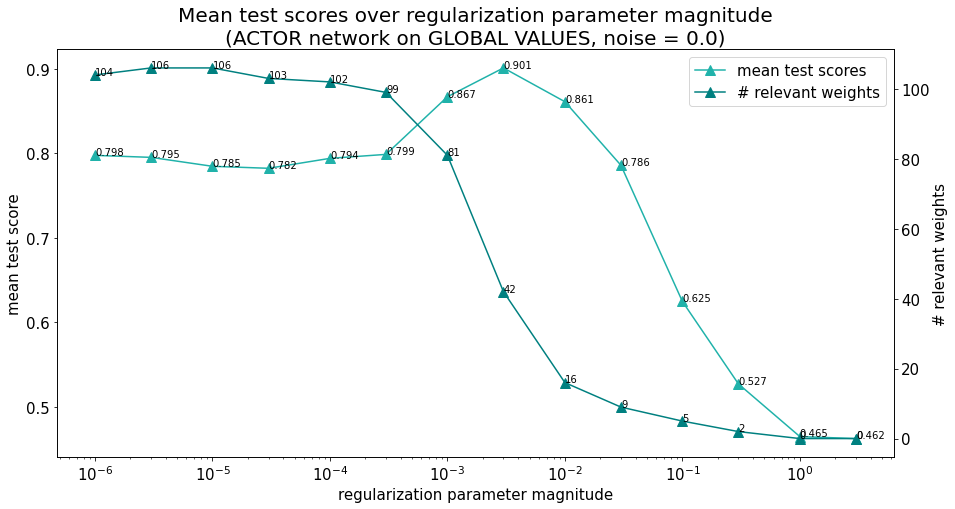

In [13]:
importlib.reload(clf)

noise_mag = np.array([0])
param_mag = np.array([3, 1, 3e-1, 1e-1, 3e-2, 1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 3e-5, 1e-5, 3e-6, 1e-6])#14

clf.regularization_intensity(X=net["X"], Y=label["Y"], model=model["model"], param_mag=param_mag,\
                             network=net["network"], label=label["label"], noise_mag=noise_mag, size=size)

In [11]:
importlib.reload(tun)

tun.neurons_population(frates_actor, frates_critic, label["Y"], net["network"], label["label"])

(81, 128)


,
0,0.141284
1,-0.168846
2,-0.265557
3,-0.210804
4,-0.412362
...,...
123,0.000000
124,0.000000
125,-0.166391
126,0.000000


,
22,-0.701661
5,-0.688939
29,-0.644285
19,-0.629112
97,-0.626602
...,...
34,0.070277
0,0.141284
40,0.142998
56,0.174366


(81, 128)


,
0,-0.145756
1,-0.101119
2,-0.343936
3,-0.463117
4,0.000000
...,...
123,-0.291962
124,-0.466728
125,-0.236295
126,0.000000


,
91,-0.863995
97,-0.655550
7,-0.655511
100,-0.638514
110,-0.633210
...,...
92,0.069748
42,0.136347
49,0.170143
87,0.190237


In [ ]:
import json
import numpy as np
with open('neurons_population.json', 'r') as json_file:
    data = json.load(json_file)

averages = np.array(data["averages"])
stds = np.array(data["stds"])
dcs = np.array(data["dcs"])
dcs = np.sort(dcs)
print(dcs.shape)
z = np.zeros((1,128))
print(z.shape)
z[0, :]=dcs
print(z)

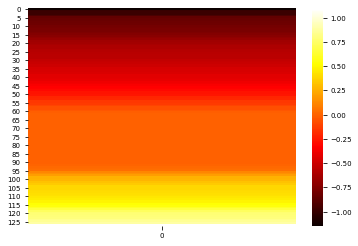

In [26]:
sbn.heatmap(z.T, cmap="hot")